# 웹 구현 전 간단한 방식으로 추천 시스템을 구현해봅니다.

In [1]:
import pandas as pd
from PIL import Image
import random

## 데이터 불러오기

In [2]:
naver_mango=pd.read_csv('/content/drive/MyDrive/KHUDA_3기/RecSys/preprocessed.csv',index_col=0) # 네이버와 망고플레이트가 통합된 웹 크롤링 데이터
insta=pd.read_csv('/content/drive/MyDrive/KHUDA_3기/RecSys/hashtags2.csv') # 인스타그램 해시태그와 게시글 내용의 웹 크롤링 데이터
customer=pd.read_csv('/content/drive/MyDrive/KHUDA_3기/RecSys/customers.csv',index_col=0) # 고객 id, interest, place, inital keyword 가 저장된 데이터
wordcloud_1=Image.open("/content/drive/MyDrive/KHUDA_3기/RecSys/wordcloud_1.png") # 인스타그램 크롤링을 바탕으로 만든 워드클라우드 (기본 모양)
wordcloud_2=Image.open("/content/drive/MyDrive/KHUDA_3기/RecSys/wordcloud_2.png") # 워드 클라우드 컵 모양
wordcloud_3=Image.open("/content/drive/MyDrive/KHUDA_3기/RecSys/wordcloud_3.png") # 워드 클라우드 미슐랭 모양

In [24]:
naver_mango= naver_mango.astype({'distance_정문':'float'})
naver_mango

,name,theme,addr,star,total_kwd_review,kwd_가성비가 좋아요,kwd_고기 질이 좋아요,kwd_기본 안주가 좋아요,kwd_단체모임 하기 좋아요,kwd_대화하기 좋아요,...,rate_혼밥하기 좋아요,rate_인테리어가 멋져요,rate_뷰가 좋아요,rate_음식이 맛있어요,rate_커피가 맛있어요,rate_빵이 맛있어요,rate_특별한 날 가기가 좋아요,rate_특별한 메뉴가 있어요,rate_재료가 신선해요,rate_특별한 날 가기 좋아요
0,201호,요리주점,경기 수원시 영통구 반달로35번길 19 2층 201호,5.00,34,6.0,0.0,0.0,1.0,9.0,...,0.000000,8.823529,0.000000,67.647059,0.000000,0.0,0,38.235294,0.000000,0.000000
1,3월3일 영통직영점,기타,경기 수원시 영통구 청명로 28 두성스포렉스 1층,0.00,56,2.0,48.0,0.0,12.0,0.0,...,0.000000,23.214286,1.785714,60.714286,0.000000,0.0,0,5.357143,0.000000,1.785714
2,BBQ치킨 용인서천점,"육류,고기요리",경기 용인시 기흥구 서천서로20번길 8,4.43,70,7.0,0.0,0.0,2.0,0.0,...,5.714286,2.857143,2.857143,72.857143,0.000000,0.0,0,11.428571,18.571429,0.000000
3,BHC치킨 수원영통점,"육류,고기요리",경기 수원시 영통구 영일로 16-8,4.01,139,9.0,0.0,0.0,5.0,0.0,...,2.158273,2.158273,0.719424,64.028777,0.000000,0.0,0,8.633094,9.352518,1.438849
4,BLEND 영통점,"카페,디저트,브런치",경기 수원시 영통구 청명남로12번길 5-27 1층,4.54,308,98.0,0.0,0.0,15.0,1.0,...,5.519481,31.493506,3.246753,77.922078,0.649351,0.0,0,21.428571,42.532468,6.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,황소가한우곱창&전골,"육류,고기요리",경기 수원시 영통구 청명남로28번길 20 112호,4.46,184,25.0,5.0,0.0,42.0,0.0,...,2.717391,3.260870,1.630435,72.282609,0.000000,0.0,0,17.934783,23.913043,2.717391
319,후니네 소곱창,"육류,고기요리",경기 수원시 영통구 청명남로28번길 20 1층 114호 후니네 소곱창,4.85,81,30.0,4.0,0.0,8.0,0.0,...,0.000000,9.876543,0.000000,170.370370,0.000000,0.0,0,19.753086,46.913580,0.000000
320,후이후이,중식,경기 수원시 영통구 덕영대로 1566 1층,4.21,697,31.0,0.0,0.0,35.0,0.0,...,3.586801,5.164993,1.434720,74.605452,0.000000,0.0,0,9.756098,14.921090,5.308465
321,훌리스 다이너,양식,경기 수원시 영통구 매영로425번길 16 1층 훌리스 다이너,0.00,121,7.0,0.0,0.0,2.0,0.0,...,8.264463,38.016529,4.958678,72.727273,0.000000,0.0,0,26.446281,14.049587,14.049587


In [3]:
# instagram 데이터 추가 전처리
insta.columns=['Hashtags','text']
for i in range(len(insta)) :
  insta.loc[i]['Hashtags']=insta.loc[i]['Hashtags'].replace('\n','')
  insta.loc[i]['text']=insta.loc[i]['text'].replace('\n',' ')
insta

,Hashtags,text
0,#정든칼국수,진한 해물육수 + 직접 담근 김치조합! 막국수 느낌의 시원한 냉칼국수까지 이열치열 ...
1,#3월3일 영통직영점,망포에서 줄서서 먹던 고깃집🙂 영통에도 상륙했다는데~? 반달공원에 찐맛집 두두등장~
2,#노가리슈퍼,영통 중상 레트로술집 ❣️ 낭낭한 분위기 + 바삭한 전주황태 한입에~ 달달구리 요구...
3,#문어상회 🐙,제철 굴김치 + 문어숙회 + 돼지수육 삼합으로 한입에 싹~~~ 먹고 <3 문어해물라...
4,#노마세야갈비찜,추운 날씨에 먹기 딱인 노마세야 갈비찜 이번에 가리비 갈비찜 메뉴까지 재출시! 국내...
...,...,...
144,#수타원,큰 소갈비 덩어리가 들어가는 갈비짬뽕! 소뼈로 우린 육수에 칼칼함가지 JMT
145,#포명천천,맛과 가성비를 한방에 해결해주는 맛집! 삼선짬뽕에 오징어 한마리 듬뿍 담아줌ㅜㅜ
146,#948키친,샐러드바가 무한리필인 맛집 종류도 다양해서 애슐리 빰치는 곳 푸파ㄱ
147,#저크트럭,여기 소고기 불초밥 존맛. 달달한 데리야끼소스 잔뜩+생양파 얇게 올라가서 개꿀맛


### 인스타 키워드 선정
* 가성비 : 가성비, 가격
* 분위기 : 분위기, 인테리어
* 지역 : 영통, 광교
* 메뉴 : 샐러드, 고기, 한우, 파스타, 브런치
* 혼밥 : 혼밥, 1인
* 카페 : 카페, 커피
* 술 : 맥주, 안주, 술집


In [4]:
insta_keyword={'가성비' : ['가성비','가격'],
               '분위기':['분위기','인테리어'],
               '혼밥':['혼밥','1인'],
               '카페':['카페','커피'],
               '디저트':['푸딩','쿠키','디저트','케이크'],
               '빙수':['빙수'],
               '술':['맥주','안주','술집','소주'],
               '와인' :['와인'],
               '영통':['영통'],
               '광교':['광교'],
               '샐러드/브런치/파스타':['샐러드','브런치','파스타','레스토랑','양식'],
               '고기':['고기','한우','고깃집'],
               '일식':['일본','초밥','튀김','스시'],
               '한식' : ['찌개','한식']}

insta_keys=list(insta_keyword.keys())

In [62]:
# 인스타 게시물 내용에서 useful한 키워드 찾아보기..
for t in insta['text'] :
  if ('찌개' in t) or ('한식' in t):
    print(t)

돈가스 하나 시키면 튀김에 찌개까지! 평점 5점에 빛나는 가성비 맛집
한우 사골육수와 프리미엄 햄과 소세지로 만드는 30년 전통 부대찌개 맛집!
영통중심상가 대표한식 주점 뜨끈매콤한 닭도리탕으로🐔 몸보신하고 자작한 국물을 계란밥에 쓱싹해서 마무리🍳  바삭고소한 야채호박전 뜨거운 돌판에 나오니까 끝까지 뜨겁게 혀를 달군다9👅  거기에 누룽지특주 한 잔까지!!! 맛난 한식이 가득한 누룽지에
김치찌개에 통고기 들어가는 미친 양..여기 계란말이도 존맛인 거 알고들있나~?


In [ ]:
customer

,id,interest,place,initial_keyword
0,1,0,1,"[1, 2, 3]"
1,2,1,2,"[2, 3, 4]"


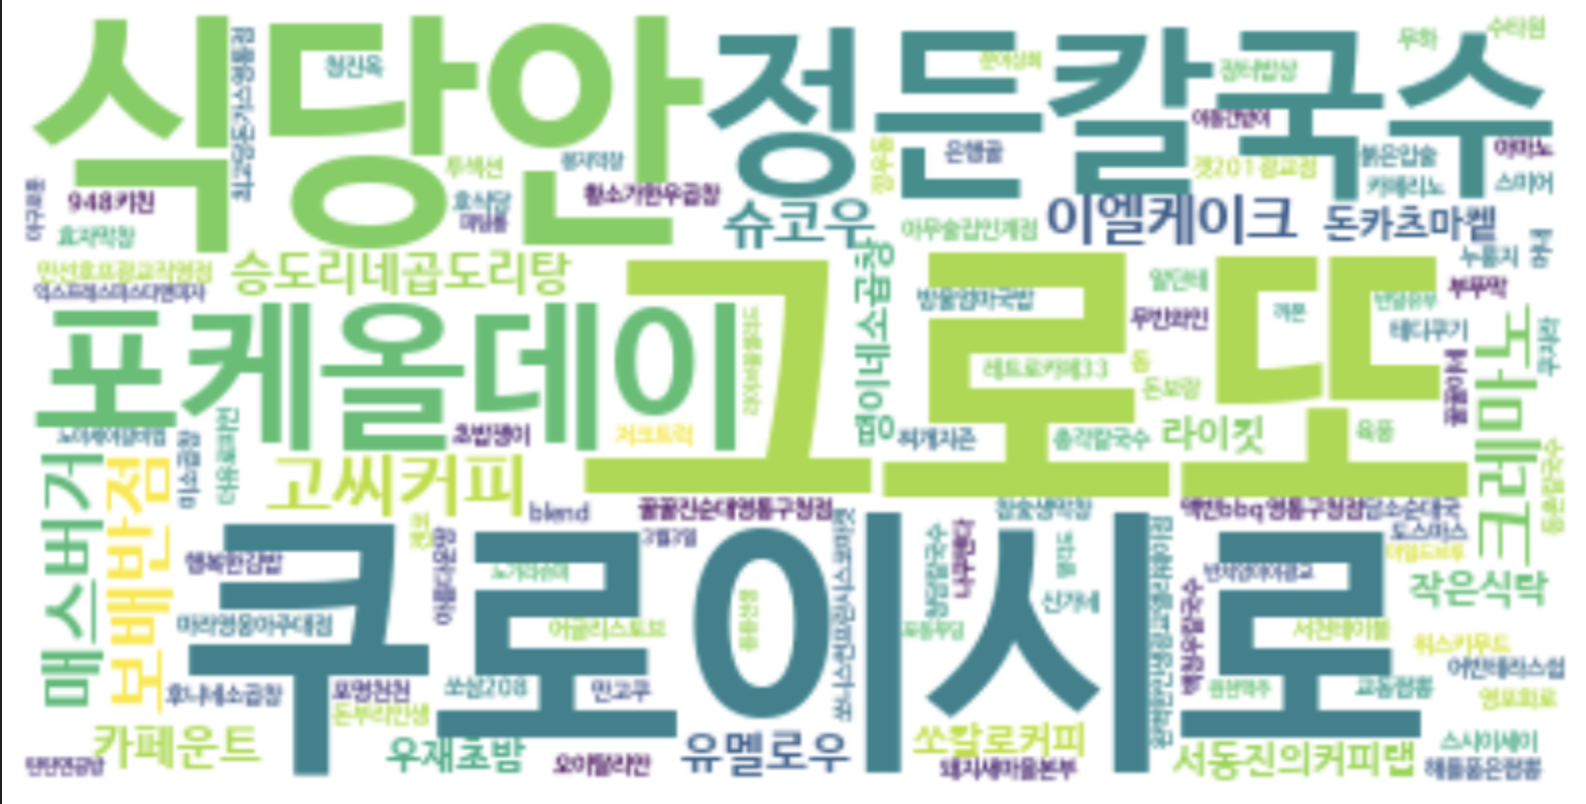

In [ ]:
wordcloud_1.show()

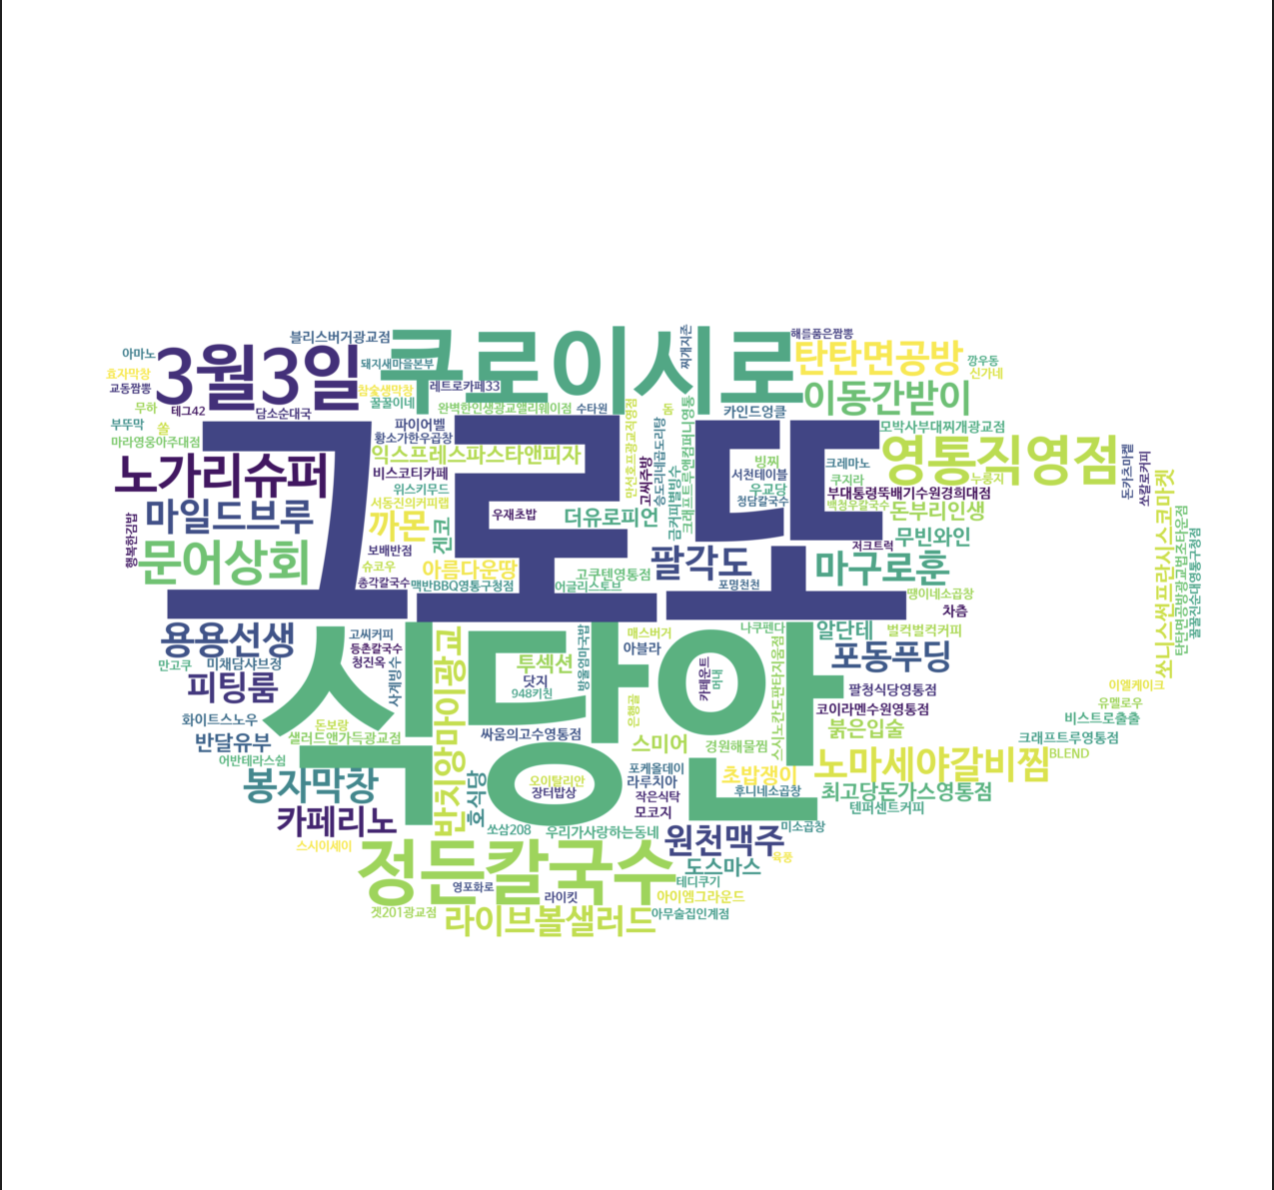

In [ ]:
wordcloud_2.show()

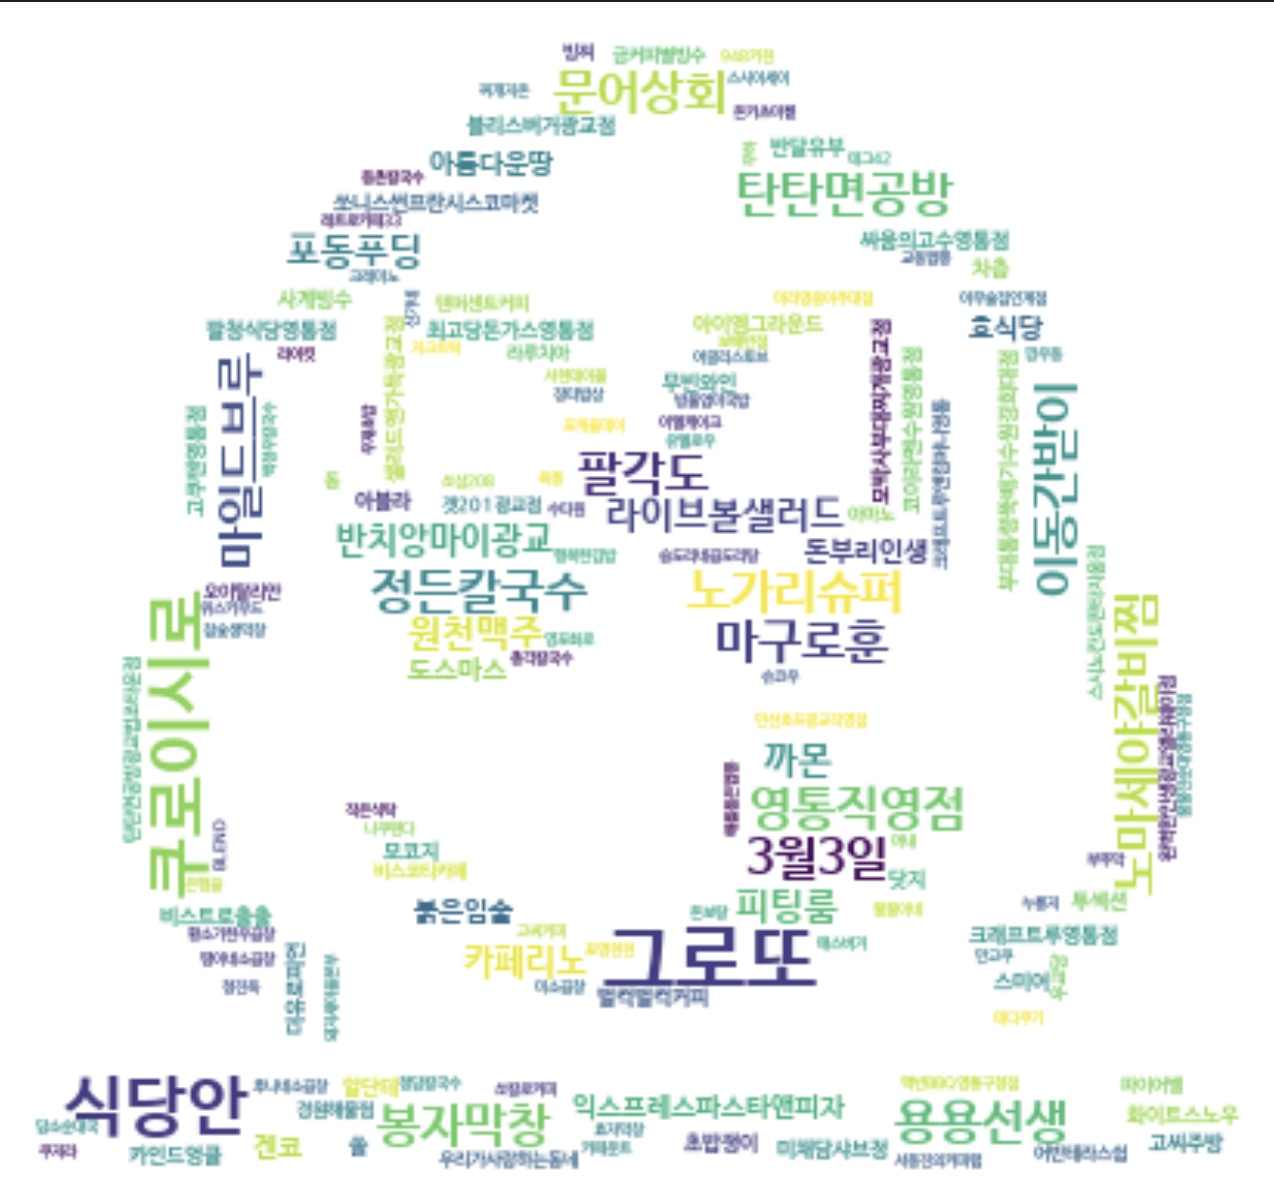

In [ ]:
wordcloud_3.show()

## 추천시스템 구현에서 언급한 필터링 작업을 수행합니다.
### 추천 시스템 설계
상황에 관계없는 거랑
user-id
* 맛집 관심도
    - 관심 낮음 : popularity 반영 큼 인스타그램 워드클라우드 + 게시글 내용
    - 관심 높음 : popularity 반영 적음  추가 선택 이후 추천
* 평소 자주 가는 지역
    - 서천(용인), 중상, 정건 택1
        - 자주 가는 곳 : popularity 반영 적음
        - 가끔 가는 곳 : popularity 반영 큼
-> Popularity에 대한 가중치 계산

* 상황에 관계없는 (취향에 가까운) 키워드
    : ' 1- popularity 가중치 ' 만큼 중요하게

상황에 관계있는거
*  메뉴
    : ['요리주점', '기타', '육류,고기요리', '카페,디저트,브런치', '패스트푸드', '한식', '분식',
       '해물,생선', '일식', '중식', '양식', '아시아음식'] : filtering
*  거리
    : 거리를 일정 기준으로 가까움/보통/멈 분류를 미리 해두면 좋을듯 : filtering
*  현재 상황과 관련 있는 키워드
    : 되게 중요하게 반영해야함 = 어느정도 보장되어야 함 -> 가중치 , 이 키워드가 포함되거나 일정 비율 이상 있는 경우

In [5]:
'''
keyword_list=['가성비가 좋아요', '건강한 맛이에요', '고기 질이 좋아요',
       '기본 안주가 좋아요', '단체모임 하기 좋아요', '대화하기 좋아요', '디저트가 맛있어요',
       '룸이 잘 되어있어요', '매장이 넓어요', '매장이 청결해요', '메뉴 구성이 알차요',
       '반려동물과 가기 좋아요', '반찬이 잘 나와요', '뷰가 좋아요', '비싼 만큼 가치있어요',
       '빵이 맛있어요', '사진이 잘 나와요', '샐러드바가 잘 되어있어요', '술이 다양해요',
       '아늑해요', '아이와 가기 좋아요', '야외 공간이 멋져요', '양이 많아요',
       '오래 머무르기 좋아요', '음료가 맛있어요', '음식이 맛있어요', '음식이 빨리 나와요',
       '음악이 좋아요', '인테리어가 멋져요', '읽을만한 책이 많아요', '잡내가 적어요',
       '재료가 신선해요', '종류가 다양해요', '좌석이 편해요', '주차하기 편해요',
       '직접 잘 구워줘요', '집중하기 좋아요', '차분한 분위기에요', '친절해요',
       '커피가 맛있어요', '컨셉이 독특해요', '코스요리가 알차요', '특별한 날 가기 좋아요',
       '특별한 메뉴가 있어요', '포장이 깔끔해요', '향신료가 강하지 않아요', '현지 맛에 가까워요',
       '혼밥하기 좋아요', '혼술하기 좋아요', '화장실이 깨끗해요', '환기가 잘 돼요']
'''

keyword_list=['1 : 가성비가 좋아요',
              '2 : 메뉴 구성이 알차요',
              '3 : 음식이 맛있어요',
              '4 : 재료가 신선해요',
              '5 : 특별한 날 가기 좋아요',
              '6 : 뷰가 좋아요',
              '7 : 인테리어가 멋저요',
              '8 : 컨셉이 독특해요',
              '9 : 특별한 메뉴가 있어요']

keyword_pair={ 1 : 'kwd_가성비가 좋아요',
              2 : 'kwd_메뉴 구성이 알차요',
              3 : 'kwd_음식이 맛있어요',
              4 : 'kwd_재료가 신선해요',
              5 : 'kwd_특별한 날 가기 좋아요',
              6 : 'kwd_뷰가 좋아요',
              7 : 'kwd_인테리어가 멋저요',
              8 : 'kwd_컨셉이 독특해요',
              9 : 'kwd_특별한 메뉴가 있어요'}

In [6]:
# initial user : 사전 정보 입력 받는 과정
flag=True
while flag :
    print(" ______'장소 발견의 가치'를 제공하는 희대의 맛집 추천 시스템______")
    print(" 처음 이용하신다면 0을 입력해주시고, 그렇지 않다면 1을 입력해주세요. ")
    num=int(input())
    if num==0 :
      print("희대의 맛집 추천 시스템에 오신 것을 환영합니다.")
      print("다음 이용을 위해서 숫자로 된 ID를 입력해주세요.")
      while (True) :
        id=int(input())
        if id in customer['id'].to_list() :
          print("중복된 id입니다. 다른 숫자를 입력해주세요")
        else :
          print("등록 가능한 id입니다.")
          break
      print("처음 이용하시는 분을 위한 간단한 사전 질문이 있습니다. 답해주시면 추천에 큰 도움이 됩니다:)")
      print(" 나는 평소 맛집에 대한 관심도가 ... : 0 - 높다, 1 - 낮다")
      interest=int(input())
      print(" 평소 자주 가는 지역이 어디이신가요? 0 - 서천, 1 - 정건, 2 - 중상")
      place=int(input())
      print( " 다음 키워드 중에서 식당을 고를 때 중요하게 생각하는 요소를 최소 1가지에서 최대 3가지까지 골라주세요. 예: 1,2,3 ")
      print(keyword_list)
      keyword=list(map(int,input().split(',')))
      customer.loc[len(customer)]=[id,interest,place,keyword]
      print(" 정상적으로 등록이 되었습니다. 감사합니다.")
      flag=False
    else :
      cnt=0
      print("기존에 등록하셨던 ID를 입력해주세요")
      while True :
        id=int(input())
        if id in customer['id'].to_list() :
          print("확인되었습니다. 감사합니다.")
          flag=False
          break
        else :
          print("등록되지 않은 ID 입니다.")
          cnt+=1
          if cnt==3 :
            print("ID가 3번 일치하지 않아 처음으로 돌아갑니다.. \n . . . ")
            break


 ______'장소 발견의 가치'를 제공하는 희대의 맛집 추천 시스템______
 처음 이용하신다면 0을 입력해주시고, 그렇지 않다면 1을 입력해주세요. 
0
희대의 맛집 추천 시스템에 오신 것을 환영합니다.
다음 이용을 위해서 숫자로 된 ID를 입력해주세요.
3
등록 가능한 id입니다.
처음 이용하시는 분을 위한 간단한 사전 질문이 있습니다. 답해주시면 추천에 큰 도움이 됩니다:)
 나는 평소 맛집에 대한 관심도가 ... : 0 - 높다, 1 - 낮다
1
 평소 자주 가는 지역이 어디이신가요? 0 - 서천, 1 - 정건, 2 - 중상
2
 다음 키워드 중에서 식당을 고를 때 중요하게 생각하는 요소를 최소 1가지에서 최대 3가지까지 골라주세요. 예: 1,2,3 
['1 : 가성비가 좋아요', '2 : 메뉴 구성이 알차요', '3 : 음식이 맛있어요', '4 : 재료가 신선해요', '5 : 특별한 날 가기 좋아요', '6 : 뷰가 좋아요', '7 : 인테리어가 멋저요', '8 : 컨셉이 독특해요', '9 : 특별한 메뉴가 있어요']
1
 정상적으로 등록이 되었습니다. 감사합니다.


In [7]:
# 장소 업데이트 함수
def place_update(user_df,user_id) :
  place_pair={0:'서천',1:'정건',2:'중상'}
  place=customer[customer['id']==user_id]['place'][user_df.index[0]]
  print(f" 등록되어있는 위치는 {place_pair[place]}입니다. 변경하지 않으시려면 -1을 입력해주세요. 변경하고 싶다면 1개 이상의 숫자를 입력해주세요.")
  print("0 : 서천, 1 : 정건, 2 : 중상")
  new_place=list(map(int,input().split(',')))
  if new_place[0] != -1 :
    return new_place
  else :
    return place

# 음식 종류 입력 함수
def menu() :
  menu_pair={1:'요리주점', 2:'기타', 3:'육류,고기요리', 4:'카페,디저트,브런치', 5:'패스트푸드', 6:'한식', 7:'분식',
       8:'해물,생선', 9:'일식', 10:'중식', 11:'양식', 12:'아시아음식'}
  print("선호하는 음식 종류가 있으신가요? 특별히 상관 없다면 0을 입력해주세요. 종류를 선택하려면 다음과 같이 입력해주세요. 예: 1,2,3,5")
  print(menu_pair)
  menu_list=list(map(int,input().split(',')))
  if menu_list[0]==0 :
    return menu_pair.values()
  else :
    result=[]
    for menu in menu_list :
      result.append(menu_pair[menu])
    return result


# 인원 입력 함수
def num_people() :
  print("식사하려는 인원이 중요할까요? 0 : 혼밥, 1 : 상관 없다, 2 : 단체")
  people=int(input())
  if people==0 :
    return ['kwd_혼밥하기 좋아요','kwd_혼술하기 좋아요']
  elif people==2 :
    return ['kwd_단체모임 하기 좋아요','kwd_매장이 넓어요']
  else :
    return []

# 인스타 랜덤 키워드
def insta_random() :
  num=random.randrange(0, 14)
  key=insta_keys[num]
  key_list=insta_keyword[key]
  test='|'.join(key_list)
  temp_df=insta[insta['text'].str.contains(test)]
  return temp_df

In [8]:
# 필요한 함수 선언 , 초기 정보 ( 맛집 관심도, 주 거주지, 초기키워드 )
# 맛집 관심도가 낮은 경우
#best-seller 방식으로 초기 키워드+ 장소 + 인원에 대한 추천 + 인스타그램 랜덤 게시글 추천 + 인스타그램 워드클라우드 띄워주기
def non_interest_recom(user_id) :
  ##### 정보 업데이트 및 추가 #####
  # user 정보 가져오기
  user_df=customer[customer['id']==user_id]
  # 장소 업데이트
  new_place=place_update(user_df,user_id)
  # 기존 키워드 받아오기
  initial_keyword=user_df['initial_keyword'][user_df.index[0]]
  keyword_list=[]
  for key in initial_keyword :
    keyword_list.append(keyword_pair[key])
  # 메뉴 받아오기
  like_menu=menu()
  # 인원 받아오기
  people_keyword=num_people()

  ###### best-seller 방식으로 추천 : 장소, 키워드, 메뉴, 인원 #####
  store_list=[]
  # 장소로 1차 필터링
  place_list=[]
  if 0 in new_place :
    place_list.extend(['용인'])
  if 1 in new_place :
    place_list.extend(['덕영대','영일', '반달', '매영', '청명'])
  if 2 in new_place :
    place_list.extend(['청명남', '청명북', '매영', '봉영', '영통', '청명'])
  place_list=list(set(place_list))
  place_test='|'.join(place_list)
  first_df=naver_mango[naver_mango['addr'].str.contains(place_test)]
  # 메뉴로 2차 필터링
  menu_test='|'.join(like_menu)
  second_df=first_df[first_df['theme'].str.contains(menu_test)]
  # '키워드 + 인원' 로 마지막 필터링
  store_list=[]
  final_keywords=list(set(keyword_list+people_keyword))
  for key in final_keywords :
    key=key.replace('kwd','rate')
    stores=second_df.sort_values(by=key,ascending=False)[:5]['name'].values
    for s in stores :
      store_list.append(s)
  print(store_list)
  store_list=list(set(store_list))
  # 가게 이름
  for store in store_list :
    print('가게 이름 : ',store)
  # 인스타그램 랜덤 게시글 추천 : 인스타그램 데이터의 개수 범위 내에서 중복 없이 난수 생성해서 해당 태그와 함께 게시글 내용
  insta_df=insta_random()
  display(insta_df['Hashtags'])
  # 인스타그램 워드클라우드 띄어주기
  wordcloud_2.show()


 등록되어있는 위치는 정건입니다. 변경하지 않으시려면 -1을 입력해주세요. 변경하고 싶다면 1개 이상의 숫자를 입력해주세요.
0 : 서천, 1 : 정건, 2 : 중상
1,2
선호하는 음식 종류가 있으신가요? 특별히 상관 없다면 0을 입력해주세요. 종류를 선택하려면 다음과 같이 입력해주세요. 예: 1,2,3,5
{1: '요리주점', 2: '기타', 3: '육류,고기요리', 4: '카페,디저트,브런치', 5: '패스트푸드', 6: '한식', 7: '분식', 8: '해물,생선', 9: '일식', 10: '중식', 11: '양식', 12: '아시아음식'}
1,2,3,5
식사하려는 인원이 중요할까요? 0 : 혼밥, 1 : 상관 없다, 2 : 단체
0
['고메스퀘어 영통점', '고운돈 79냉삼집', '비스트로 출출', '고쿠텐 영통점', '최대감', '닷지', '엘리펀트 캐슬', '영통타코야끼', '용용선생 수원영통점', '비스트로 출출', '맥도날드 경희대국제캠퍼스점', '양심소 본점', '애슐리퀸즈 수원망포점', '영통맛집 야들야들한보약족발 수원영통점', '소담촌 수원영통점', '맥도날드 경희대국제캠퍼스점', '어른김밥', '고쿠텐 영통점', 'Poke all day 포케&샐러드 영통점', '미정국수0410 영통역점']
가게 이름 :  고운돈 79냉삼집
가게 이름 :  미정국수0410 영통역점
가게 이름 :  닷지
가게 이름 :  영통맛집 야들야들한보약족발 수원영통점
가게 이름 :  소담촌 수원영통점
가게 이름 :  애슐리퀸즈 수원망포점
가게 이름 :  비스트로 출출
가게 이름 :  맥도날드 경희대국제캠퍼스점
가게 이름 :  엘리펀트 캐슬
가게 이름 :  Poke all day 포케&샐러드 영통점
가게 이름 :  용용선생 수원영통점
가게 이름 :  어른김밥
가게 이름 :  고쿠텐 영통점
가게 이름 :  양심소 본점
가게 이름 :  고메스퀘어 영통점
가게 이름 :  최대감
가게 이름 :  영통타코야끼


,Hashtags,text
12,#라이브볼샐러드,다이어터들도 맛있게 여러가지 샐러드를 즐길수있는 맛집
17,#반치앙마이광교,태국 브런치 카페&캐주얼 펍으로 광교에서 즐길 수 있는 태국여행!
19,#익스프레스파스타앤피자,피자와 파스타를 동시에 즐길 수 있는 곳! 밥약도 많이 하는 장소임!
24,#그로또,파스타 및 브런치 맛집으로 이미 영통에서 소문난 소개팅 분위기 맛집!
25,#붉은입술,다양한 와인을 파는 퓨전 레스토랑으로 분위기와 맛 둘 다 잡은 맛집!
26,#아름다운땅,이탈리안 레스토랑으로 화덕피자와 다양한 이탈리안 요리 맛 볼 수 있음!
27,#쏘니스썬프란시스코마켓,외국에 온 듯한 느낌을 주는 이국적인 분위기의 브런치 맛집
30,#스미어,"낮에는 브런치와 카페, 밤에는 와인다이닝으로 운영하는 양식 맛집"
31,#알단테,광교 카페 거리에서 이미 소문난 파스타 맛집으로 분위기까지 좋음!
32,#투섹션,샹들리에가 분위기 다하는 다이닝펍 레스토랑으로 식스센스에도 나옴!


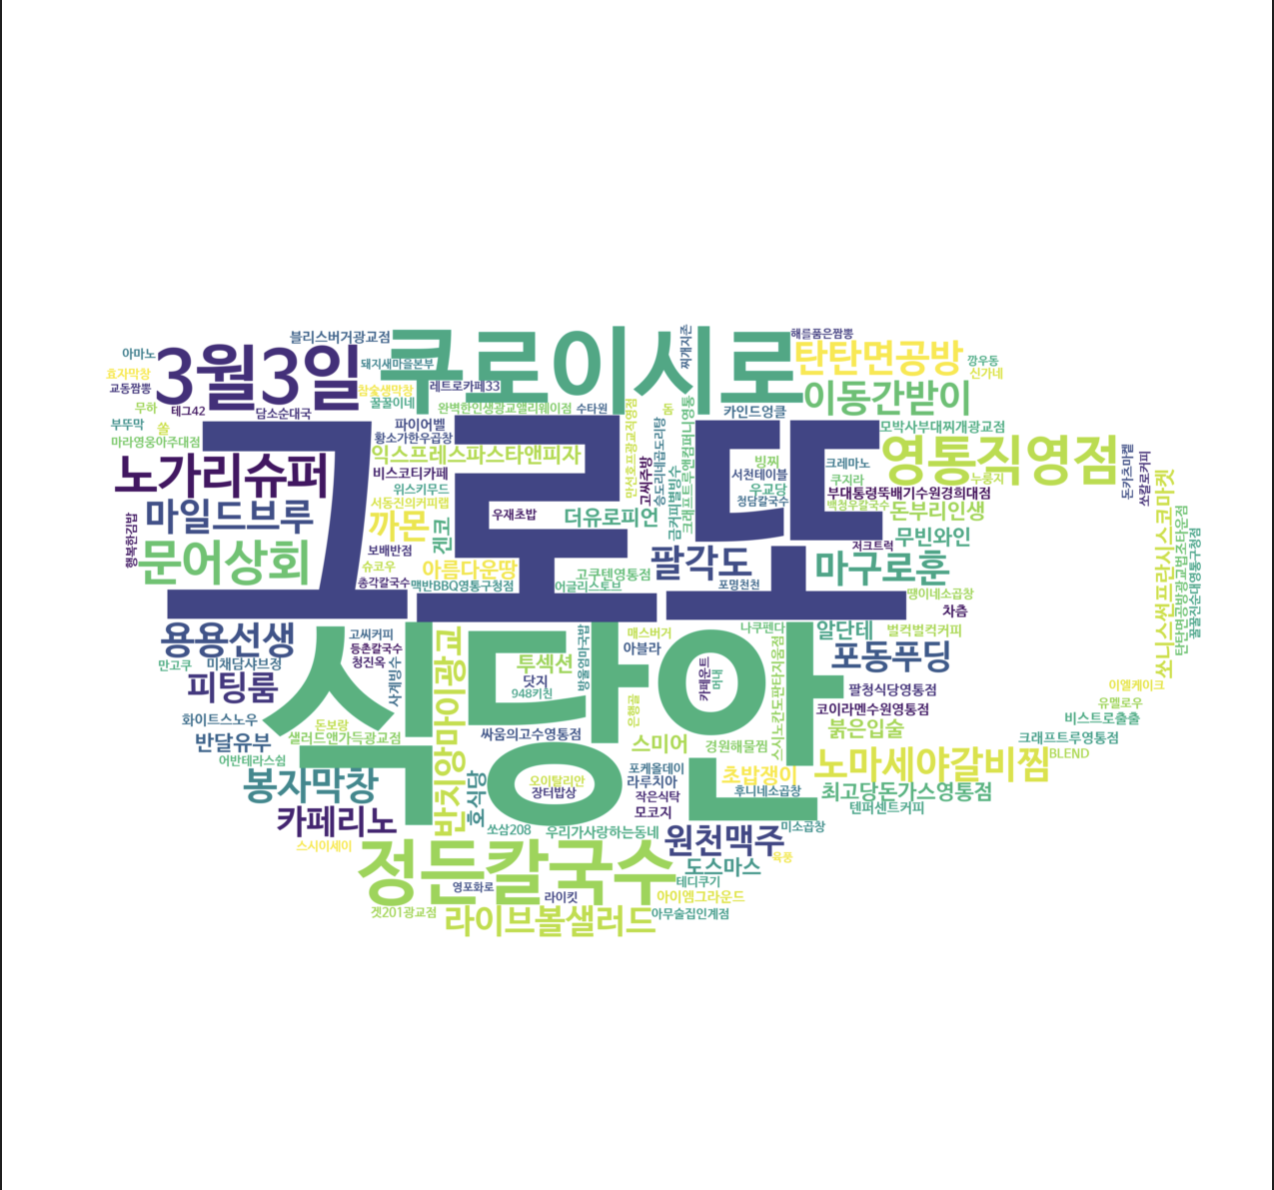

In [133]:
non_interest_recom(3)

In [10]:
naver_mango.columns

Index(['name', 'theme', 'addr', 'star', 'total_kwd_review', 'kwd_가성비가 좋아요',
       'kwd_고기 질이 좋아요', 'kwd_기본 안주가 좋아요', 'kwd_단체모임 하기 좋아요', 'kwd_대화하기 좋아요',
       'kwd_디저트가 맛있어요', 'kwd_매장이 넓어요', 'kwd_매장이 청결해요', 'kwd_메뉴 구성이 알차요',
       'kwd_반찬이 잘 나와요', 'kwd_뷰가 좋아요', 'kwd_비싼 만큼 가치있어요', 'kwd_빵이 맛있어요',
       'kwd_사진이 잘 나와요', 'kwd_술이 다양해요', 'kwd_아늑해요', 'kwd_야외 공간이 멋져요',
       'kwd_양이 많아요', 'kwd_오래 머무르기 좋아요', 'kwd_음료가 맛있어요', 'kwd_음식이 맛있어요',
       'kwd_음식이 빨리 나와요', 'kwd_음악이 좋아요', 'kwd_인테리어가 멋져요', 'kwd_읽을만한 책이 많아요',
       'kwd_재료가 신선해요', 'kwd_종류가 다양해요', 'kwd_좌석이 편해요', 'kwd_주차하기 편해요',
       'kwd_직접 잘 구워줘요', 'kwd_집중하기 좋아요', 'kwd_차분한 분위기에요', 'kwd_친절해요',
       'kwd_커피가 맛있어요', 'kwd_컨셉이 독특해요', 'kwd_특별한 날 가기 좋아요', 'kwd_특별한 메뉴가 있어요',
       'kwd_포장이 깔끔해요', 'kwd_향신료가 강하지 않아요', 'kwd_현지 맛에 가까워요', 'kwd_혼밥하기 좋아요',
       'kwd_혼술하기 좋아요', 'kwd_화장실이 깨끗해요', 'kwd_환기가 잘 돼요', 'summarized_review',
       'distance_정문', 'distance_class', 'rate_가성비가 좋아요', 'rate_메뉴 구성이 알차요',
       'rate_단체모임 하기 좋아요', 'rate_혼밥하기 

In [11]:
select_keyword_pair={1 : '가성비가 좋아요', 2 : '메뉴 구성이 알차요',
        3 : '인테리어가 멋져요', 4 : '뷰가 좋아요',
         5 : '음식이 맛있어요', 6 : '커피가 맛있어요', 7 : '빵이 맛있어요',
          8 : '특별한 메뉴가 있어요', 9 : '재료가 신선해요', 10 : '특별한 날 가기 좋아요'}

In [45]:
# 맛집 관심도가 높은 경우를 위한 추가 함수

# 장소 추가 필터링
def place_filter(df) :
  print(" 정문을 기준으로 최대 거리(단위:km)를 입력해주세요.")
  max_dist=float(input())
  return df[df['distance_정문']<=max_dist]


# 추가 키워드 선택
def keyword_select(user_id,keyword_list) :
  temp_keyword_list=[0]*len(keyword_list)
  print(" 현재 등록된 키워드는 다음과 같습니다. ")
  for idx in range(len(keyword_list)) :
    temp_keyword_list[idx]=keyword_list[idx].replace('kwd_','')
  print(temp_keyword_list)
  print(" 추가로 선택하실 키워드를 선택해주세요. ")
  print(select_keyword_pair)
  temp_list=list(map(int,input().split(',')))
  new_key_list=[]
  for key in temp_list :
    new_key_list.append('kwd_'+select_keyword_pair[key])
  drop_duplicate=list(set(keyword_list+new_key_list))
  return drop_duplicate

# 인스타 선택 키워드
def insta_select() :
  print("다음 중 원하는 키워드를 하나 골라주세요 ")
  print(insta_keys)
  num=int(input())
  key=insta_keys[num]
  key_list=insta_keyword[key]
  test='|'.join(key_list)
  temp_df=insta[insta['text'].str.contains(test)]
  return temp_df

In [23]:
naver_mango[naver_mango['name']=='애슐리퀸즈 수원망포점']

,name,theme,addr,star,total_kwd_review,kwd_가성비가 좋아요,kwd_고기 질이 좋아요,kwd_기본 안주가 좋아요,kwd_단체모임 하기 좋아요,kwd_대화하기 좋아요,...,rate_혼밥하기 좋아요,rate_인테리어가 멋져요,rate_뷰가 좋아요,rate_음식이 맛있어요,rate_커피가 맛있어요,rate_빵이 맛있어요,rate_특별한 날 가기가 좋아요,rate_특별한 메뉴가 있어요,rate_재료가 신선해요,rate_특별한 날 가기 좋아요
171,애슐리퀸즈 수원망포점,기타,경기 수원시 영통구 덕영대로 1566 판타지움 2층,0.0,2114,393.0,0.0,0.0,298.0,0.0,...,2.932829,4.919584,1.702933,44.891202,0.0,0.0,0,10.879849,9.271523,12.251656


In [46]:
# 맛집 관심도가 높은 경우
def interest_recom(user_id) :
  ##### 정보 업데이트 및 추가 #####
  # user 정보 가져오기
  user_df=customer[customer['id']==user_id]
  # 장소 업데이트
  new_place=place_update(user_df,user_id)
  # 기존 키워드 받아오기
  initial_keyword=user_df['initial_keyword'][user_df.index[0]]
  keyword_list=[]
  for key in initial_keyword :
    keyword_list.append(keyword_pair[key])
  # 추가 키워드 받아오기
  new_keyword_list=keyword_select(user_id,keyword_list)
  # 메뉴 받아오기
  like_menu=menu()
  # 인원 받아오기
  people_keyword=num_people()

  ###### 추천
  store_list=[]
  # 장소, 정문으로부터 거리로 1차 필터링
  place_list=[]
  if 0 in new_place :
    place_list.extend(['용인'])
  if 1 in new_place :
    place_list.extend(['덕영대','영일', '반달', '매영', '청명'])
  if 2 in new_place :
    place_list.extend(['청명남', '청명북', '매영', '봉영', '영통', '청명'])
  place_list=list(set(place_list))
  place_test='|'.join(place_list)
  temp_df=naver_mango[naver_mango['addr'].str.contains(place_test)]
  first_df=place_filter(temp_df)
  # 메뉴로 2차 필터링
  menu_test='|'.join(like_menu)
  second_df=first_df[first_df['theme'].str.contains(menu_test)]
  # '키워드 + 인원' 로 마지막 필터링
  index_list=[]
  final_keywords=list(set(keyword_list+people_keyword))
  for key in final_keywords :
    indices=second_df.sort_values(by=key,ascending=False)[:5].index
    for idx in indices :
      index_list.append(idx)
  index_list=list(set(index_list))
  for idx in index_list :
    print('********************************************************')
    print('가게 이름 : ',naver_mango['name'][idx])
    print('음식 종류 : ',naver_mango['theme'][idx])
    print('주소 : ',naver_mango['addr'][idx])
    print('별점 : ',naver_mango['star'][idx])
    print('요약 리뷰',naver_mango['summarized_review'][idx])
  # 인스타그램 선택 게시글 추천 :
  insta_df=insta_select()
  display(insta_df)

In [48]:
interest_recom(3)

 등록되어있는 위치는 중상입니다. 변경하지 않으시려면 -1을 입력해주세요. 변경하고 싶다면 1개 이상의 숫자를 입력해주세요.
0 : 서천, 1 : 정건, 2 : 중상
2
 현재 등록된 키워드는 다음과 같습니다. 
['가성비가 좋아요']
 추가로 선택하실 키워드를 선택해주세요. 
{1: '가성비가 좋아요', 2: '메뉴 구성이 알차요', 3: '인테리어가 멋져요', 4: '뷰가 좋아요', 5: '음식이 맛있어요', 6: '커피가 맛있어요', 7: '빵이 맛있어요', 8: '특별한 메뉴가 있어요', 9: '재료가 신선해요', 10: '특별한 날 가기 좋아요'}
3,5
선호하는 음식 종류가 있으신가요? 특별히 상관 없다면 0을 입력해주세요. 종류를 선택하려면 다음과 같이 입력해주세요. 예: 1,2,3,5
{1: '요리주점', 2: '기타', 3: '육류,고기요리', 4: '카페,디저트,브런치', 5: '패스트푸드', 6: '한식', 7: '분식', 8: '해물,생선', 9: '일식', 10: '중식', 11: '양식', 12: '아시아음식'}
3,4,9
식사하려는 인원이 중요할까요? 0 : 혼밥, 1 : 상관 없다, 2 : 단체
1
 정문을 기준으로 최대 거리(단위:km)를 입력해주세요.
0.5
********************************************************
가게 이름 :  BLEND 영통점
음식 종류 :  카페,디저트,브런치
주소 :  경기 수원시 영통구 청명남로12번길 5-27 1층
별점 :  4.54
요약 리뷰 nan
********************************************************
가게 이름 :  최고당돈가스 영통점
음식 종류 :  일식
주소 :  경기 수원시 영통구 영일로21번길 8-1 최고당돈가스 영통점
별점 :  4.42
요약 리뷰 nan
********************************************************
가게 이름 :  Poke all day 포

,Hashtags,text
2,#노가리슈퍼,영통 중상 레트로술집 ❣️ 낭낭한 분위기 + 바삭한 전주황태 한입에~ 달달구리 요구...
5,#용용선생,화산마라전골이 유명한곳 홍콩식 인테리어 분위기
24,#그로또,파스타 및 브런치 맛집으로 이미 영통에서 소문난 소개팅 분위기 맛집!
25,#붉은입술,다양한 와인을 파는 퓨전 레스토랑으로 분위기와 맛 둘 다 잡은 맛집!
27,#쏘니스썬프란시스코마켓,외국에 온 듯한 느낌을 주는 이국적인 분위기의 브런치 맛집
29,#더유로피언,화려한 샹들리에 인테리어가 인상적이고 신라호텔 쉐프가 만드는 맛집!
31,#알단테,광교 카페 거리에서 이미 소문난 파스타 맛집으로 분위기까지 좋음!
32,#투섹션,샹들리에가 분위기 다하는 다이닝펍 레스토랑으로 식스센스에도 나옴!
47,#아이엠그라운드,핸드메이드 그릭 요거트와 그레놀라가 맛있고 인테리어도 예쁜 신상 카페!
48,#크래프트루영통점,수요미식회에도 나온 #크래프트루 영통점🍺 양조장에서 갓 생산된 신선한 수제맥주와 다...
